In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import pandas as pd

In [20]:
#Parameter Kendaraan
lebar = 2.1
tinggi = 3.57
ca = 0.85
af = 6.37

pi = np.pi

kode = "235/75-R17.5"
jari_jari = 0.4

massa_kosong = 8180
massa_isi = 1020
massa_total = massa_kosong + massa_isi

gearbox = 1
axle = 5.86
final_gr = gearbox * axle
mech_eff = 1

kec_max_kmh = 90
kec_operasi_kmh = 50

kec_max_rpm = final_gr*30*(kec_max_kmh/3.6)/pi/jari_jari
kec_operasi_rpm = final_gr*30*(kec_operasi_kmh/3.6)/pi/jari_jari

t_ramp = 20
a = kec_max_kmh/3.6/t_ramp

theta = 8
theta_percentage = np.tan(np.radians(theta))

crr = 0.02
cd  = 1.05
rho = 1.25
vw  = 0
g   = 9.81
ca  = 1

const_t         = 908.19
highacc_const_t = 1251.89
wp              = 35
# avg_acc = 0.75
p_motor         = (const_t*mech_eff*final_gr/jari_jari)*(wp/3.6)/1000
# high_acc_wp     =

v_cruise            = 60
s_cruise            = 200
t_cruise            = s_cruise/v_cruise
cruise_percentage   = 33
pt_cruise           = cruise_percentage/100*p_motor

In [21]:
#Tabel Performansi
v_runres = np.arange(0,121,1)

jumlah_variasi = 5
variasi_array = np.arange(0,jumlah_variasi+1,1)
pengali = variasi_array/jumlah_variasi
gradien = np.full(shape=len(variasi_array),fill_value=theta,dtype=np.int)*pengali

rd = rho/2*af*cd*np.square((v_runres/3.6+vw/3.6))
rg = massa_total*g*np.sin(np.radians(gradien))
rrr = massa_total*crr*g*np.cos(np.radians(gradien))

runres_vehicle = np.array([])
for i in range (0,len(variasi_array)):
    temp = rd+rg[i]+rrr[i]
    runres_vehicle = np.concatenate((runres_vehicle,temp))
runres_vehicle = np.reshape(runres_vehicle,(len(v_runres),len(variasi_array)),order='F')
runres_wheel = runres_vehicle * jari_jari
runres_motor = runres_wheel/final_gr

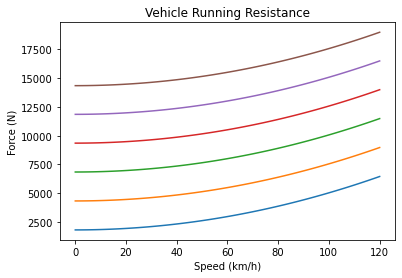

In [22]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_vehicle[:,i]);
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Vehicle Running Resistance');

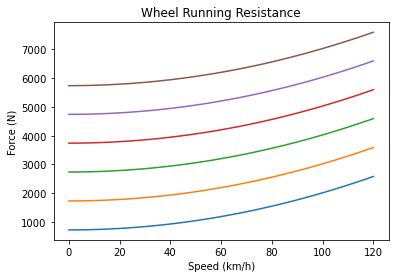

In [24]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_motor[:,i]);
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Motor Running Resistance');

In [ ]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_wheel[:,i]);
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Wheel Running Resistance');

In [23]:
#Tractive Effort

const_f = const_t*final_gr/jari_jari*gearbox
v_wp    = wp/3.6
const_p = const_f*v_wp
